# Hand in: all details of your computations (the design of your neural network, the information table of the neural network. Find the best learning rate by the . )


# Problem1

In [127]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [128]:
from platform import python_version

print(python_version())

3.9.12


In [129]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [130]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [131]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [132]:
# Common imports
import numpy as np
import os

In [133]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [134]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron 

In [135]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [136]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

In [137]:
assert tf.__version__ >= "2.0"

In [138]:
import tensorflow as tf
from tensorflow import keras

In [139]:
tf.__version__

'2.10.0'

In [140]:
keras.__version__

'2.10.0'

## Train a deep MLP on the MNIST dataset 
(you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. 

Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). 

Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

Let's load the dataset:

In [141]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels

The validation set contains 5,000 images, and the test set contains 10,000 images

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [142]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [143]:
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(55000, 28, 28) (5000, 28, 28) (10000, 28, 28)
(55000,) (5000,) (10000,)


1. Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'` color map:

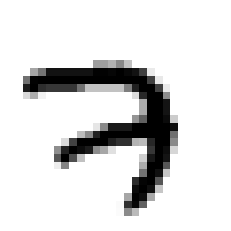

In [144]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

2. The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [145]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [146]:
X_valid.shape

(5000, 28, 28)

In [147]:
X_test.shape

(10000, 28, 28)

3. look at a sample of the images in the dataset:

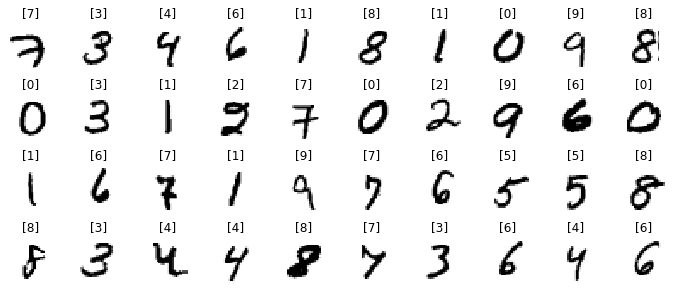

In [148]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title([y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
 
plt.show()

In [149]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [150]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [151]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [152]:
model.layers

In [153]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [154]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [155]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [156]:
model.get_layer(hidden1.name) is hidden1

True

In [157]:
weights, biases = hidden1.get_weights()

In [158]:
weights

array([[-0.01643964,  0.00999007,  0.00788722, ...,  0.03246116,
        -0.0657726 , -0.05655358],
       [-0.06778579, -0.05001555,  0.01659254, ..., -0.0138964 ,
        -0.02834217, -0.04137713],
       [ 0.06348336, -0.05195113, -0.05244021, ..., -0.01432639,
        -0.02281046,  0.06804262],
       ...,
       [-0.0278129 , -0.02499617,  0.05236994, ...,  0.0675936 ,
         0.01191815, -0.024099  ],
       [ 0.06036291, -0.00652315,  0.0140424 , ..., -0.00785663,
        -0.03446728,  0.06452802],
       [ 0.05909465, -0.00487635,  0.02753984, ...,  0.05094987,
        -0.0447975 ,  0.02953191]], dtype=float32)

In [159]:
weights.shape

(784, 300)

In [160]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [161]:
biases.shape

(300,)

4. Build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [162]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [163]:
# training the model and saving metrics in history
# minibatch
history = model.fit(X_train, y_train,
          batch_size=128, epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 5s 9ms/step - loss: 1.1477 - accuracy: 0.7273 - val_loss: 0.5649 - val_accuracy: 0.8668
Epoch 2/30
430/430 [==============================] - 3s 6ms/step - loss: 0.4771 - accuracy: 0.8759 - val_loss: 0.3866 - val_accuracy: 0.8978
Epoch 3/30
430/430 [==============================] - 3s 6ms/step - loss: 0.3748 - accuracy: 0.8977 - val_loss: 0.3272 - val_accuracy: 0.9128
Epoch 4/30
430/430 [==============================] - 4s 8ms/step - loss: 0.3295 - accuracy: 0.9082 - val_loss: 0.2958 - val_accuracy: 0.9206
Epoch 5/30
430/430 [==============================] - 4s 8ms/step - loss: 0.3013 - accuracy: 0.9157 - val_loss: 0.2727 - val_accuracy: 0.9272
Epoch 6/30
430/430 [==============================] - 3s 8ms/step - loss: 0.2805 - accuracy: 0.9214 - val_loss: 0.2568 - val_accuracy: 0.9302
Epoch 7/30
430/430 [==============================] - 3s 6ms/step - loss: 0.2637 - accuracy: 0.9262 - val_loss: 0.2409 - val_accuracy: 0.9348
Epoch 

In [164]:
#stochastic gradient decent
historysgd = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1203 - accuracy: 0.9659 - val_loss: 0.1193 - val_accuracy: 0.9662
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1104 - accuracy: 0.9683 - val_loss: 0.1164 - val_accuracy: 0.9676
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1018 - accuracy: 0.9713 - val_loss: 0.1053 - val_accuracy: 0.9722
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0936 - accuracy: 0.9738 - val_loss: 0.1016 - val_accuracy: 0.9742
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9760 - val_loss: 0.0967 - val_accuracy: 0.9738
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0805 - accuracy: 0.9773 - val_loss: 0.0945 - val_accuracy: 0.9738
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0748 - accuracy: 0.9793 - val_loss: 0.0908 - val_accuracy:

In [165]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 430}

In [166]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [167]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

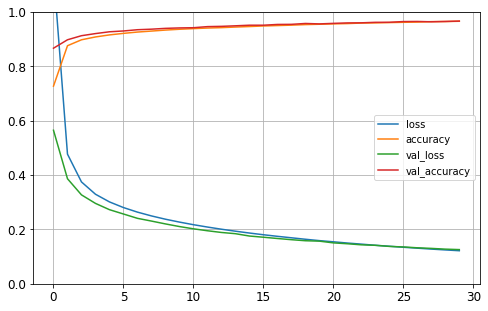

In [168]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

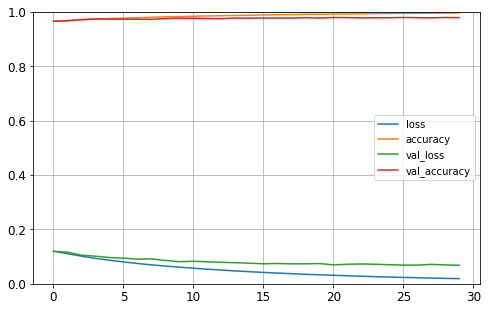

In [169]:
pd.DataFrame(historysgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

In [170]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9789


[0.06995173543691635, 0.9789000153541565]

In [171]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 138ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [172]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 47ms/step


array([7, 2, 1], dtype=int64)

In [173]:
np.array([y_pred])

array([[7, 2, 1]], dtype=int64)

In [174]:
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

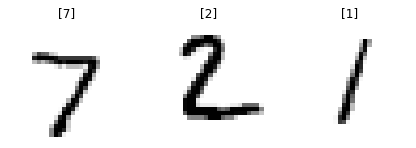

In [175]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title([y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
 
plt.show()

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:
Now let's train the model for just 1 epoch:
We can now plot the loss as a function of the learning rate:
Find a good learning rate.

In [176]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [177]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [178]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [179]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [180]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.5997 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

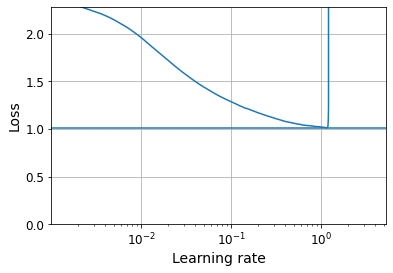

In [181]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [182]:
min(expon_lr.losses)

1.01248037815094

In [183]:
expon_lr.rates[np.argmin(expon_lr.losses)]

1.289619

In [184]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [185]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [186]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

C:\Users\Noah\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [187]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.2318 - accuracy: 0.9273 - val_loss: 0.1105 - val_accuracy: 0.9662
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0952 - accuracy: 0.9704 - val_loss: 0.1045 - val_accuracy: 0.9708
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0650 - accuracy: 0.9796 - val_loss: 0.0765 - val_accuracy: 0.9774
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0485 - accuracy: 0.9840 - val_loss: 0.0829 - val_accuracy: 0.9780
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0910 - val_accuracy: 0.9744
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0306 - accuracy: 0.9895 - val_loss: 0.0857 - val_accuracy: 0.9770
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0931 - val_accuracy

# Problem 2:

###   Train a deep neural network on the MRI slices dataset.  

In [188]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'C:/python/ML Lab2/MRI_Images/MRI_Images/'
labels = pd.read_csv(file_dir + 'labels.csv')
display(labels)
y = labels.CDR

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [189]:
data = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

    
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(487,) (122,)


In [190]:
DS = 8             # Downsample rate, must be a multiple of 30976

N_train = y_train.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros([N_train*DS, im_size])
    
for n in range(N_train):
    for i in range(DS):
        Xds_train[n+i,:] = X_train[n,i::DS]
        yds_train[n+i] = y[n]
        
print(Xds_train.shape)

(3896, 3872)


In [191]:
DS = 8             # Downsample rate, must be a multiple of 30976

N_test = y_test.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_test = np.zeros([N_test*DS, im_size])
yds_test = np.zeros([N_test*DS, im_size])
    
for n in range(N_test):
    for i in range(DS):
        Xds_test[n+i,:] = X_test[n,i::DS]
        yds_test[n+i] = y[n]
        
print(Xds_test.shape)

(976, 3872)


In [192]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

y_train = y_train.iloc[:, 0]
y_test = y_test.iloc[:, 0]

In [193]:
Xds_train.shape

(3896, 3872)

In [194]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [195]:
optimizer = tf.keras.optimizers.SGD(lr=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

C:\Users\Noah\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [196]:
X_train.shape
y_train.shape

(487,)

In [197]:
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
16/16 [==============================] - 2s 48ms/step - loss: 1.0858 - accuracy: 0.5092
Epoch 2/30
16/16 [==============================] - 1s 48ms/step - loss: 0.7777 - accuracy: 0.5154
Epoch 3/30
16/16 [==============================] - 1s 49ms/step - loss: 0.7723 - accuracy: 0.5154
Epoch 4/30
16/16 [==============================] - 1s 49ms/step - loss: 0.7038 - accuracy: 0.5544
Epoch 5/30
16/16 [==============================] - 1s 49ms/step - loss: 0.7118 - accuracy: 0.5565
Epoch 6/30
16/16 [==============================] - 1s 48ms/step - loss: 0.6978 - accuracy: 0.5729
Epoch 7/30
16/16 [==============================] - 1s 48ms/step - loss: 0.7177 - accuracy: 0.5175
Epoch 8/30
16/16 [==============================] - 1s 50ms/step - loss: 0.7331 - accuracy: 0.4887
Epoch 9/30
16/16 [==============================] - 1s 48ms/step - loss: 0.7171 - accuracy: 0.5462
Epoch 10/30
16/16 [==============================] - 1s 44ms/step - loss: 0.7027 - accuracy: 0.5503
Epoch 11/